In [2]:
!wget -O clock0400.png https://cdn.discordapp.com/attachments/628965994156785694/1176402324831350876/clock0400.png
!wget -O clock0900.png https://cdn.discordapp.com/attachments/628965994156785694/1176402325091401888/clock0900.png
!wget -O clock0910.png https://cdn.discordapp.com/attachments/628965994156785694/1176402325364035696/clock0910.png
!wget -O clock1000.png https://cdn.discordapp.com/attachments/628965994156785694/1176402325586325535/clock1000.png
!wget -O Oil.png https://cdn.discordapp.com/attachments/628965994156785694/1176402325888319578/Oil.png

--2023-11-21 16:48:19--  https://cdn.discordapp.com/attachments/628965994156785694/1176402324831350876/clock0400.png
Resolving cdn.discordapp.com (cdn.discordapp.com)... 162.159.134.233, 162.159.130.233, 162.159.135.233, ...
Connecting to cdn.discordapp.com (cdn.discordapp.com)|162.159.134.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16725 (16K) [image/png]
Saving to: ‘clock0400.png’

clock0400.png       100%[===================>]  16.33K  --.-KB/s    in 0s      

2023-11-21 16:48:19 (115 MB/s) - ‘clock0400.png’ saved [16725/16725]

--2023-11-21 16:48:19--  https://cdn.discordapp.com/attachments/628965994156785694/1176402325091401888/clock0900.png
Resolving cdn.discordapp.com (cdn.discordapp.com)... 162.159.133.233, 162.159.130.233, 162.159.129.233, ...
Connecting to cdn.discordapp.com (cdn.discordapp.com)|162.159.133.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15727 (15K) [image/png]
Saving to: ‘clock0900.png’

clock09

# **Q1**

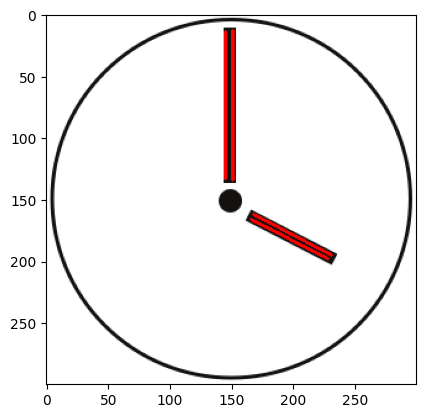

Time result: 4:00



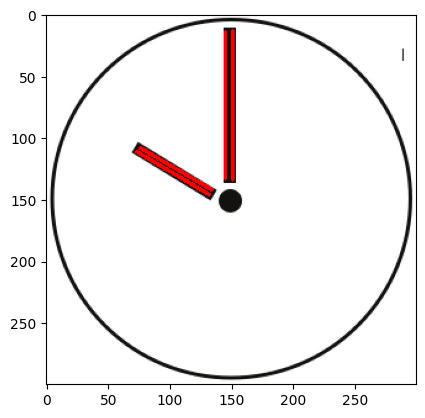

Time result: 10:00



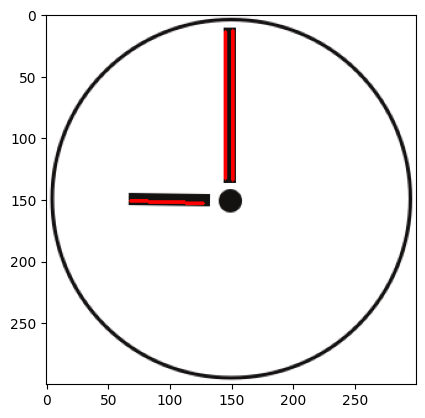

Time result: 9:00



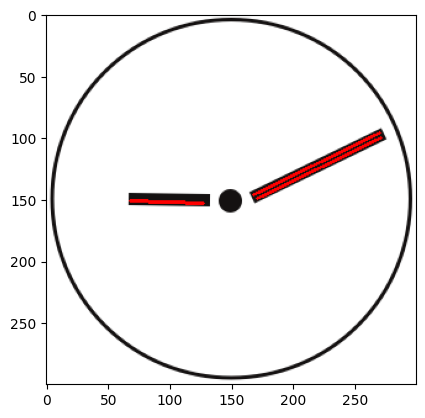

Time result: 9:10



In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math


def detect_hands_and_calculate_time(image_path):
    # Load the image
    img = np.copy(cv2.imread(image_path))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    m,n,_ = img.shape
    m,n = m//2,n//2
    mask1,mask2 = np.ones_like(gray),np.ones_like(gray)
    cv2.circle(mask1,(m,n),140,0,-1)
    cv2.circle(mask1,(m,n),15,1,-1)
    _,gray = cv2.threshold(gray,128,1,cv2.THRESH_BINARY)
    kernel = np.ones((5, 5), np.uint8)
    gray = cv2.dilate(gray, kernel, iterations=1)
    gray = cv2.bitwise_or(mask1,gray)
    edges = cv2.Canny(gray, 0, 1, apertureSize=3)

    # Hough Line Transform
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=40, minLineLength=30, maxLineGap=5)

    # Assuming the longest line is the minute hand and second longest is the hour hand
    if lines is not None:
        lines = sorted(lines, key=lambda x: np.linalg.norm(x[0][:2] - x[0][2:4]), reverse=True)
        minute_hand = lines[0][0]

        if len(lines) > 3:
          hour_hand = np.array([(lines[2][0][0] + lines[3][0][0])/2, (lines[2][0][1] + lines[3][0][1])/2, (lines[2][0][2] + lines[3][0][2])/2, (lines[2][0][3] + lines[3][0][3])/2])
        elif len(lines) > 2:
          hour_hand = lines[len(lines) - 1][0]
        else:
          hour_hand = None

        # Calculate angles and time
        center = (img.shape[0] // 2, img.shape[1] // 2)
        minute_angle = calculate_angle(minute_hand, center)
        hour_angle = calculate_angle(hour_hand, center) if hour_hand is not None else None

        minute = math.floor(minute_angle / 360 * 60) % 60
        hour = math.ceil(hour_angle / 360 * 12) if hour_angle is not None else None

        for line in lines:
            for x1,y1,x2,y2 in line:
                cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

        plt.imshow(img)
        plt.show()
        return hour, minute
    else:

        plt.imshow(img)
        plt.show()
        return None, None

def calculate_angle(line, center):
    x1, y1, x2, y2 = line

    x = x2 - 150
    y = y2 - 152 #center of the clock

    angle = math.atan( abs(x) / abs(y) )

    angle = np.degrees(angle)

    if x < 0 and y >= 0:
      angle = 180 + angle
    elif x < 0 and y < 0:
      angle = 360 - angle
    elif x >= 0 and y >= 0:
      angle = 180 - angle

    return angle

def cal(path):
    hour, minute = detect_hands_and_calculate_time(path)
    if hour is not None and minute is not None:
        print(f"Time result: {hour}:{minute:02d}")
        print()
    else:
        print("Could not detect clock hands")

# Example usage
cal('clock0400.png')
cal('clock1000.png')
cal('clock0900.png')
cal('clock0910.png')

#***Q3***

<ipython-input-37-a0d5b5c4886a>:12: RuntimeWarning: divide by zero encountered in log
  img_log = (np.log(image + 1)/(np.log(1 + np.max(image)))) * 255


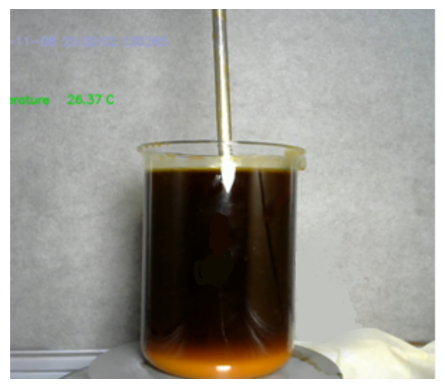

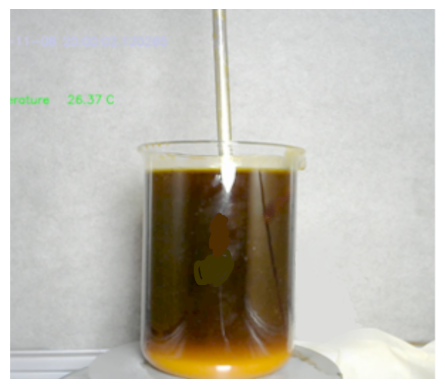

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
file_path = 'Oil.png'
image = cv2.imread(file_path, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# Apply log transform for image enhancement
img_log = (np.log(image + 1)/(np.log(1 + np.max(image)))) * 255
img_log = np.array(img_log, dtype=np.uint8)

# Apply gamma correction for power law transform
gamma = 0.5
img_gamma = np.array(255*(image / 255) ** gamma, dtype='uint8')

# Display the images
plt.imshow(image)
plt.axis('off')
plt.show()
plt.imshow(img_gamma)
plt.axis('off')
plt.show()


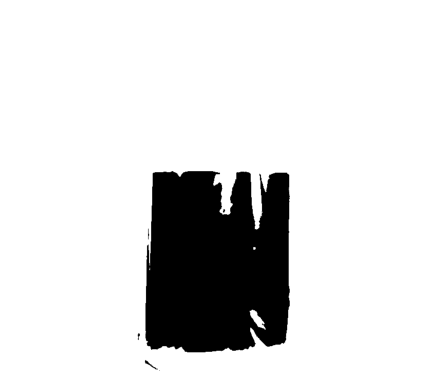

In [23]:
from skimage.filters import threshold_otsu
from skimage import measure
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Convert power-law image to grayscale
gray_power_law = cv2.cvtColor(img_gamma, cv2.COLOR_RGB2GRAY)

# Manual Thresholding - we select a threshold value that might be suitable
manual_thresh_value = 100
_, manual_mask = cv2.threshold(gray_power_law, manual_thresh_value, 255, cv2.THRESH_BINARY)

plt.imshow(manual_mask, cmap='gray')
plt.axis("off")
plt.show()


In [14]:
def segment_dark_area(image,ori):
  # Convert the image to grayscale.
#   gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Apply Otsu's thresholding to binarize the image.
#   _, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

  # Find the contours of the dark area.
  contours, _ = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

  areaArray = []

  #   print(contours)
  for i, c in enumerate(contours):
    area = cv2.contourArea(c)
    areaArray.append(area)

  sorteddata = sorted(zip(areaArray, contours), key=lambda x:x[0], reverse=True)

  # Find the largest contour.
  largest_contour = sorteddata[1][1]

  # Draw a rectangle around the largest contour.
  x, y, w, h = cv2.boundingRect(largest_contour)
  cv2.rectangle(ori, (x, y), (x + w, y + h), (255,0, 0), 2)

  # Calculate the height of the rectangle.
  height = h
  width = w

  return ori, height, width

In [32]:
def volumeCal(height_pixel,width_pixel):
    cm_per_pix = 18 / width_pixel
    width_cm = 18
    height_cm = cm_per_pix * height_pixel
    volume = np.pi * (width_cm/2)**2 * height_cm
    return volume,height_cm,width_cm

The height is 22.58 cm3
The width is 18.00 cm3
The volume is 5745.78 cm3


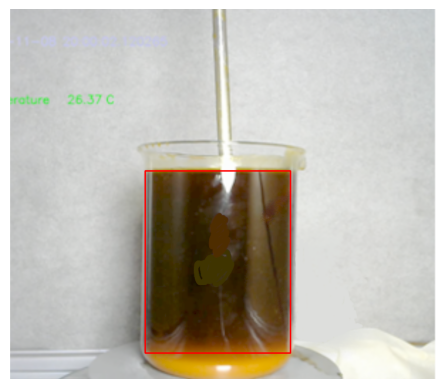

In [33]:
img_con = np.copy(img_gamma)
im, height_pixel, width_pixel = segment_dark_area(manual_mask,img_con)
# print(h,w)
v,h,w = volumeCal(height_pixel,width_pixel)
print(f"The height is {h:.2f} cm3")
print(f"The width is {w:.2f} cm3")
print(f"The volume is {v:.2f} cm3")
plt.imshow(im)
plt.axis("off")
plt.show()

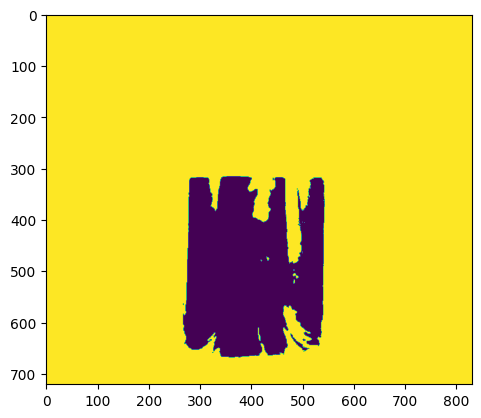

total number of object is  11
[[   267    316    276    353  77627]
 [     0      0    830    721 520623]
 [   499    405      1      1      1]
 [   503    406      1      1      1]
 [   499    463      1      1      1]
 [   499    465      1      1      1]
 [   429    473      6      8     26]
 [   418    479      3      3      5]
 [   482    498      2      2      4]
 [   481    505     11     11     52]
 [   482    517      3      8     19]
 [   413    611      5     26     70]]
[  267   316   276   353 77627]


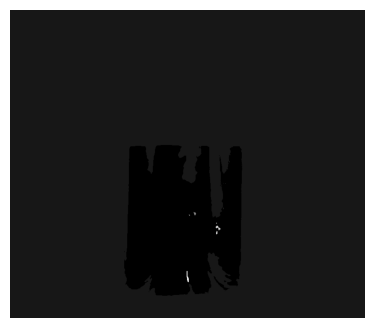

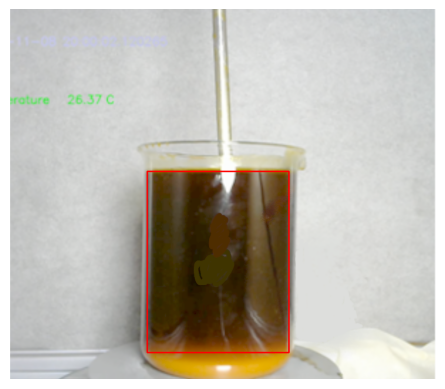

The height is 23.02 cm3
The width is 18.00 cm3
The volume is 5858.32 cm3


In [62]:
img_concom_rgb = np.copy(img_gamma)
img_concom = cv2.cvtColor(img_concom_rgb, cv2.COLOR_BGR2GRAY)
ret,thresh1 = cv2.threshold(img_concom,70,255,cv2.THRESH_BINARY)
plt.imshow(thresh1)
plt.show()

# You need to choose 4 or 8 for connectivity type
connectivity = 8

output = cv2.connectedComponentsWithStats(thresh1, connectivity, cv2.CV_32S)

# Get the results
# The first cell is the number of labels
num_labels = output[0]-1
# The second cell is the label matrix
labels = output[1]
# The third cell is the stat matrix
stats = output[2]
# The fourth cell is the centroid matrix
centroids = output[3]

fig = plt.figure(figsize=(12,4))
plt.subplot(121),plt.imshow(cv2.cvtColor(img_concom, cv2.COLOR_BGR2RGB))

print("total number of object is ", num_labels)
print(stats)

sortedstat = sorted(stats, key=lambda x: x[4], reverse=True)
print(sortedstat[1])
x,y,w,h,_ = sortedstat[1]

cv2.rectangle(img_concom_rgb, (x, y), (x + w, y + h), (255,0, 0), 2)

plt.imshow(labels,cmap='gray')
plt.axis("off")
plt.show()

plt.imshow(img_concom_rgb)
plt.axis("off")
plt.show()

v,h,w = volumeCal(h,w)
print(f"The height is {h:.2f} cm3")
print(f"The width is {w:.2f} cm3")
print(f"The volume is {v:.2f} cm3")